# Who is the best network provider in Dec 2021
### ( parameters : speed more than average speed, strong signal strength, more 4G technology )

## Import required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

## Load Dataset

In [3]:
myspeed= pd.read_csv('December_MySpeed_2021.csv')

## Explore Dataset

In [4]:
myspeed.head(10)

,operator,technology,download,speed,signal_strength,lsa
0,AIRTEL,4G,download,33873.0,-94,NaN
1,AIRTEL,4G,upload,4545.0,na,NaN
2,AIRTEL,4G,upload,7053.0,-86,Haryana
3,AIRTEL,4G,upload,15713.0,-86,Haryana
4,AIRTEL,4G,upload,25746.0,-95,NaN
5,AIRTEL,4G,upload,6629.0,-87,NaN
6,AIRTEL,4G,upload,9603.0,-90,NaN
7,AIRTEL,4G,upload,97.0,-98,NaN
8,AIRTEL,4G,upload,8939.0,-92,NaN
9,AIRTEL,4G,upload,8918.0,-92,NaN


In [5]:
myspeed.tail(10)

,operator,technology,download,speed,signal_strength,lsa
957966,AIRTEL,4G,download,12966.0,-96,NaN
957967,AIRTEL,4G,download,22995.0,-74,NaN
957968,AIRTEL,4G,download,12321.0,-97,NaN
957969,AIRTEL,4G,download,63499.0,-104,NaN
957970,AIRTEL,4G,download,2690.0,-106,NaN
957971,AIRTEL,4G,download,21126.0,-81,NaN
957972,AIRTEL,4G,download,22196.0,-95,NaN
957973,AIRTEL,4G,download,17356.0,-107,NaN
957974,AIRTEL,4G,download,593.0,-91,NaN
957975,AIRTEL,4G,download,2386.0,-94,NaN


In [6]:
myspeed.shape

(957976, 6)

In [7]:
myspeed.columns

Index(['operator', 'technology', 'download', 'speed', 'signal_strength',
       'lsa'],
      dtype='object')

In [8]:
myspeed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 957976 entries, 0 to 957975
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   operator         957976 non-null  object 
 1   technology       957976 non-null  object 
 2   download         957976 non-null  object 
 3   speed            957717 non-null  float64
 4   signal_strength  957976 non-null  object 
 5   lsa              229475 non-null  object 
dtypes: float64(1), object(5)
memory usage: 43.9+ MB


In [9]:
myspeed.isnull().sum()

operator                0
technology              0
download                0
speed                 259
signal_strength         0
lsa                728501
dtype: int64

In [10]:
for i in myspeed.describe( include= object):
    print(i)
    print(myspeed[i].unique())
    print('.'*25)

operator
['AIRTEL' 'Vi India' 'CELLONE' 'JIO']
.........................
technology
['4G' '3G']
.........................
download
['download' 'upload']
.........................
signal_strength
['-94' 'na' '-86' '-95' '-87' '-90' '-98' '-92' '-96' '-89' '-84' '-85'
 '-91' '-102' '-103' '-106' '-109' '-108' '-110' '-83' '-100' '-72' '-88'
 '-76' '-111' '-74' '-77' '-71' '-81' '-66' '-69' '-73' '-75' '-70' '-67'
 '-97' '-80' '-93' '-105' '-78' '-79' '-101' '-99' '-104' '-107' '-82'
 '-112' '-68' '-62' '-55' '-51' '-59' '-61' '-57' '-53' '-65' '-63' '-52'
 '-60' '-54' '-58' '-64' '-56' '-50']
.........................
lsa
[nan 'Haryana' 'Maharashtra' 'Rajasthan' 'Bihar' 'Delhi' 'Karnataka'
 'Andhra Pradesh' 'Kolkata' 'Kerala' 'Tamil Nadu' 'UP East' 'West Bengal'
 'UP West' 'Gujarat' 'Chennai' 'Mumbai' 'North East' 'Assam'
 'Madhya Pradesh' 'Orissa' 'Himachal Pradesh' 'Punjab' 'Jammu & Kashmir']
.........................


In [11]:
## value counts in signal strength column because of 'na' is in string type in this column

myspeed['signal_strength'].value_counts()

signal_strength
na     64360
-90    46656
-97    31656
-95    29541
-96    29093
       ...  
-53      276
-56      245
-54      207
-52      149
-50      140
Name: count, Length: 64, dtype: int64

## Data Cleaning and Modification 

In [12]:
''' Replace NaN value of lsa by Loc_na (location not available) because there are may NaN value 
and will not be good idea to drop them all as this column not required for our analysis '''

myspeed['lsa'].replace( to_replace= np.nan, value='Loc_na', inplace= True)

In [13]:
## Replace 'na' with NaN in signal strength column 

myspeed['signal_strength'].replace(to_replace='na', value= np.nan, inplace=True)

In [14]:
myspeed.head(10)

,operator,technology,download,speed,signal_strength,lsa
0,AIRTEL,4G,download,33873.0,-94,Loc_na
1,AIRTEL,4G,upload,4545.0,NaN,Loc_na
2,AIRTEL,4G,upload,7053.0,-86,Haryana
3,AIRTEL,4G,upload,15713.0,-86,Haryana
4,AIRTEL,4G,upload,25746.0,-95,Loc_na
5,AIRTEL,4G,upload,6629.0,-87,Loc_na
6,AIRTEL,4G,upload,9603.0,-90,Loc_na
7,AIRTEL,4G,upload,97.0,-98,Loc_na
8,AIRTEL,4G,upload,8939.0,-92,Loc_na
9,AIRTEL,4G,upload,8918.0,-92,Loc_na


In [15]:
## Remove null values from speed column

myspeed.dropna(inplace=True)

In [16]:
## Change datatype of signal strength from object to float 

myspeed['signal_strength']= myspeed['signal_strength'].astype('float64')

In [17]:
myspeed.dtypes

operator            object
technology          object
download            object
speed              float64
signal_strength    float64
lsa                 object
dtype: object

In [18]:
myspeed.isnull().sum()

operator           0
technology         0
download           0
speed              0
signal_strength    0
lsa                0
dtype: int64

In [19]:
myspeed.shape

(893390, 6)

In [20]:
myspeed.head(10)

,operator,technology,download,speed,signal_strength,lsa
0,AIRTEL,4G,download,33873.0,-94.0,Loc_na
2,AIRTEL,4G,upload,7053.0,-86.0,Haryana
3,AIRTEL,4G,upload,15713.0,-86.0,Haryana
4,AIRTEL,4G,upload,25746.0,-95.0,Loc_na
5,AIRTEL,4G,upload,6629.0,-87.0,Loc_na
6,AIRTEL,4G,upload,9603.0,-90.0,Loc_na
7,AIRTEL,4G,upload,97.0,-98.0,Loc_na
8,AIRTEL,4G,upload,8939.0,-92.0,Loc_na
9,AIRTEL,4G,upload,8918.0,-92.0,Loc_na
10,AIRTEL,4G,upload,7406.0,-96.0,Loc_na


## Check for outliers 

In [21]:
myspeed.describe()

,speed,signal_strength
count,893390.000000,893390.000000
mean,11576.044900,-93.839694
std,14820.062552,11.311179
min,1.000000,-112.000000
25%,1779.000000,-103.000000
50%,6027.000000,-95.000000
75%,16195.000000,-87.000000
max,149716.000000,-50.000000


Text(0.5, 1.0, 'box plot of speed')

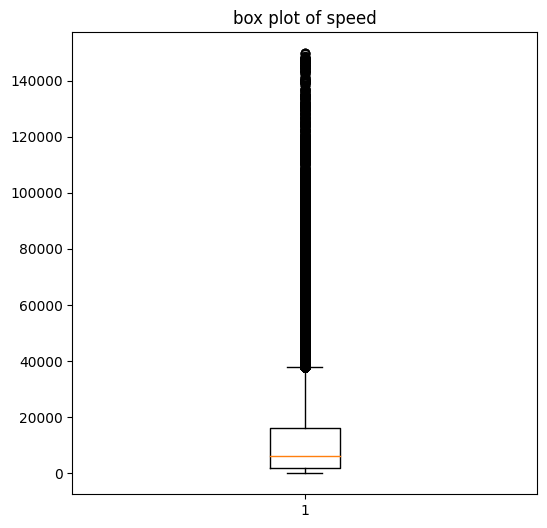

In [22]:
plt.figure(figsize=(6,6))
plt.boxplot(data=myspeed, x='speed')
plt.title('box plot of speed')

In [23]:
## According to the Bharti Airtel expert 4G speed can go upto 100 mbps or 100000 kbps.
## Similarly according to wikipedia lowest speed of 3G is 144 kbps.
## So, anything outside this range will be outlier for us.

myspeed= myspeed[myspeed['speed']<100000]
myspeed= myspeed[myspeed['speed']>144]

myspeed

,operator,technology,download,speed,signal_strength,lsa
0,AIRTEL,4G,download,33873.0,-94.0,Loc_na
2,AIRTEL,4G,upload,7053.0,-86.0,Haryana
3,AIRTEL,4G,upload,15713.0,-86.0,Haryana
4,AIRTEL,4G,upload,25746.0,-95.0,Loc_na
5,AIRTEL,4G,upload,6629.0,-87.0,Loc_na
...,...,...,...,...,...,...
957971,AIRTEL,4G,download,21126.0,-81.0,Loc_na
957972,AIRTEL,4G,download,22196.0,-95.0,Loc_na
957973,AIRTEL,4G,download,17356.0,-107.0,Loc_na
957974,AIRTEL,4G,download,593.0,-91.0,Loc_na


## Data Analysis and Visulaization 


In [24]:
myspeed.describe()

,speed,signal_strength
count,860837.000000,860837.000000
mean,11900.888072,-93.681345
std,14569.755099,11.311117
min,145.000000,-112.000000
25%,2077.000000,-103.000000
50%,6463.000000,-95.000000
75%,16716.000000,-87.000000
max,99999.000000,-50.000000


Average speed 11900.89
-------------------------


Text(0.5, 1.0, 'Operators with more than average speed of network')

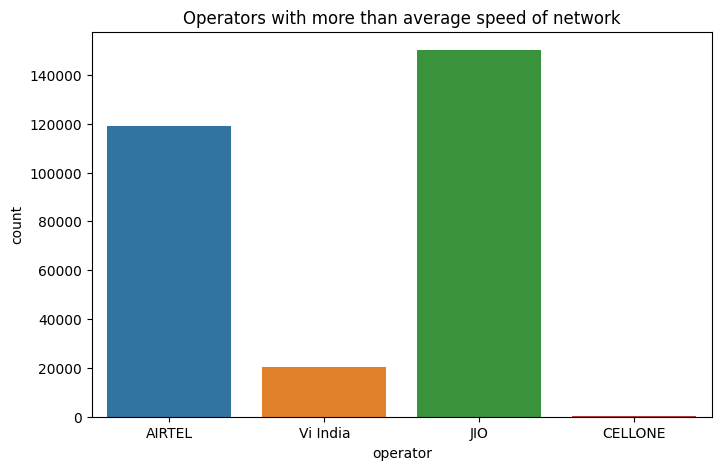

In [25]:
## calculate average speed of network and plot a graph of operators who has network speed more than average.
avg_speed= round(myspeed['speed'].mean(),2)
print('Average speed', avg_speed)
print('-'*25)

plt.figure(figsize=(8,5))
sns.countplot(data=myspeed[myspeed['speed']>avg_speed], x='operator')
plt.title('Operators with more than average speed of network')

## Here JIO is clear winner in terms of network speed followed by Airtel

In [26]:
## Average signal strength according to operators
mean_signal_strength= pd.DataFrame(round(myspeed.groupby(by= 'operator')[['signal_strength']].mean(), 2))
mean_signal_strength

,signal_strength
operator,
AIRTEL,-94.80
CELLONE,-81.05
JIO,-92.71
Vi India,-96.07


## CELLONE give the best signal strength followed by JIO 

percentage count of operator
JIO         0.49
AIRTEL      0.43
Vi India    0.08
CELLONE     0.00
Name: proportion, dtype: float64
-------------------------


Text(0.5, 1.0, 'Operator with 4G technology')

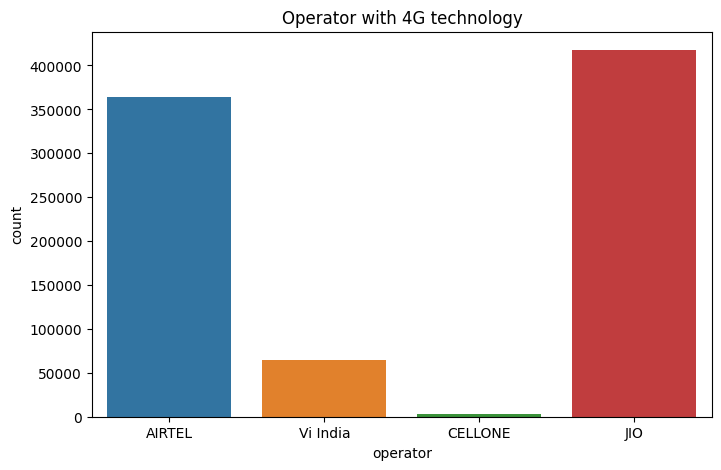

In [27]:
## calculate percentage, operators with 4G technology
tech_4G = myspeed[myspeed['technology']== '4G']
print('percentage count of',round(tech_4G['operator'].value_counts(normalize=True),2))
print('-'*25)

plt.figure(figsize=(8,5))
sns.countplot(data=tech_4G, x='operator')
plt.title('Operator with 4G technology')

## JIO with highest 4G technology followed by Airtel

# According to the given parameters JIO is clean winner, hence JIO is the best network provider in Dec 2021